In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [ ]:
df = pd.read_csv('paraclinic.csv')

In [ ]:
# پنج سطر اول

df.head()

,ردیف,سال,تاریخ حواله,سال تولد,نسبت,كد پرسنلی,شرکت,نام طرح,تاریخ بیماری,تاریخ اعلام خسارت,گروه بیماری,نوع بیماری,نوع تحویل مدارك,هزینه پاراكلینیكی اعلام شده,هزینه پاراکلینیکی پرداخت شده,درصد پرداخت,هزینه پاراكلینیكی اعلام شده2,هزینه پاراکلینیکی پرداخت شده3
0,1,401-402,1401/09/10,1363,1,461415.0,شرکتی,4,1401/09/05,1401/09/06,ویزیت و دارو,هزینه دارو,از بیمه شده,148596,30196,20.3%,148596,30196
1,2,401-402,1401/09/10,1363,1,461415.0,شرکتی,4,1401/09/05,1401/09/06,ویزیت و دارو,هزینه ویزیت,از بیمه شده,900000,810000,90.0%,900000,810000
2,3,401-402,1401/09/13,1340,4,461421.0,شرکتی,4,1401/09/03,1401/09/11,هزینه اعمال مجاز سرپائی,سایر اعمال مجاز سرپایی,از بیمه گذار,7000000,7000000,100.0%,7000000,7000000
3,4,401-402,1401/09/13,1340,4,461421.0,شرکتی,4,1401/09/03,1401/09/11,پاراکلینیکی (گروه اول),انواع آندوسکوپی و کولونوسکوپی,از بیمه گذار,17800000,12752000,71.6%,17800000,12752000
4,5,401-402,1401/09/13,1340,4,461421.0,شرکتی,4,1401/09/03,1401/09/11,ویزیت و دارو,هزینه ویزیت,از بیمه گذار,317000,317000,100.0%,317000,317000


In [ ]:
df.columns

Index(['ردیف', 'سال', 'تاریخ حواله', 'سال تولد', 'نسبت', 'كد پرسنلی', 'شرکت',
       'نام طرح', 'تاریخ بیماری', 'تاریخ اعلام خسارت', 'گروه بیماری',
       'نوع بیماری', 'نوع تحویل مدارك', 'هزینه پاراكلینیكی اعلام شده',
       'هزینه پاراکلینیکی پرداخت شده', 'درصد پرداخت',
       'هزینه پاراكلینیكی اعلام شده2', 'هزینه پاراکلینیکی پرداخت شده3'],
      dtype='object')

In [ ]:
df.shape

(230879, 18)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230879 entries, 0 to 230878
Data columns (total 18 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   ردیف                           230879 non-null  int64  
 1   سال                            230879 non-null  object 
 2   تاریخ حواله                    230879 non-null  object 
 3   سال تولد                       230879 non-null  int64  
 4   نسبت                           230879 non-null  int64  
 5   كد پرسنلی                      205639 non-null  float64
 6   شرکت                           230879 non-null  object 
 7   نام طرح                        230879 non-null  int64  
 8   تاریخ بیماری                   230879 non-null  object 
 9   تاریخ اعلام خسارت              219823 non-null  object 
 10  گروه بیماری                    230879 non-null  object 
 11  نوع بیماری                     230879 non-null  object 
 12  نوع تحویل مدارك               

## **Preparing Dataset**

### Convert columns to english

In [ ]:
new_column_names = {
    'ردیف': 'Row',
    'سال': 'Year',
    'تاریخ حواله': 'RemittanceDate',
    'سال تولد': 'BirthYear',
    'نسبت': 'Relation',
    'كد پرسنلی': 'PersonnelCode',
    'شرکت': 'Company',
    'نام طرح': 'PlanName',
    'تاریخ بیماری': 'DiseaseDate',
    'تاریخ اعلام خسارت': 'ClaimDate',
    'گروه بیماری': 'DiseaseGroup',
    'نوع بیماری': 'DiseaseType',
    'نوع تحویل مدارك': 'DocumentDeliveryType',
    'هزینه پاراكلینیكی اعلام شده': 'ReportedParaclinicCost',
    'هزینه پاراکلینیکی پرداخت شده': 'PaidParaclinicCost',
    'درصد پرداخت': 'PaymentPercentage',
    'هزینه پاراكلینیكی اعلام شده2': 'ReportedParaclinicCost2',
    'هزینه پاراکلینیکی پرداخت شده3': 'PaidParaclinicCost3'
}

df = df.rename(columns=new_column_names)

### Convert Date columns to Datetime

In [ ]:
%%capture
!pip install jdatetime

In [ ]:
import jdatetime

def format_year_range(year_str):
    try:
        start, end = year_str.split('-')
        full_start = f"1{start}"
        full_end = f"1{end}"
        return f"{full_start}-{full_end}"
    except:
        return None

def parse_jalali_date(date_str):
    try:
        jalali_date = jdatetime.datetime.strptime(date_str, '%Y/%m/%d')
        return jalali_date.date()
    except:
        return None

df['Year'] = df['Year'].apply(format_year_range)

date_columns = ['RemittanceDate', 'DiseaseDate', 'ClaimDate']
for col in date_columns:
    df[col] = df[col].apply(parse_jalali_date)

### Adding a new column to convert percentage to float

In [ ]:
def convert_percentage_to_float(percentage_str):
    try:
        number_part = percentage_str.replace('%', '')
        return float(number_part) / 100.0
    except (TypeError, ValueError):
        return None

df['PaymentPercentage_Numeric'] = df['PaymentPercentage'].apply(convert_percentage_to_float)

### Dropping trivial columns

In [ ]:
columns_to_drop = ['ReportedParaclinicCost', 'PaidParaclinicCost', 'PaymentPercentage']

df = df.drop(columns=columns_to_drop)

### Changing columns' names

In [ ]:
new_column_names = {
    'ReportedParaclinicCost2': 'Reported Cost',
    'PaidParaclinicCost3': 'Paid Cost',
}

df = df.rename(columns=new_column_names)

### Changing columns' order

In [ ]:
current_columns = df.columns.tolist()

desired_column_order = [
    'Row',
    'Year',
    'RemittanceDate',
    'BirthYear',
    'Relation',
    'PersonnelCode',
    'Company',
    'PlanName',
    'DiseaseDate',
    'ClaimDate',
    'DiseaseGroup',
    'DiseaseType',
    'DocumentDeliveryType',
    'Reported Cost',
    'Paid Cost',
    'PaymentPercentage_Numeric',
]

df = df[desired_column_order]

### Converting "PersonnelCode" to integer

In [ ]:
df['PersonnelCode'] = df['PersonnelCode'].astype('Int64')

### Translate "DiseaseGroup" data to english

In [ ]:
persian_disease_groups = [
   'ویزیت و دارو', 'هزینه اعمال مجاز سرپائی',
       'پاراکلینیکی (گروه اول)', 'سایر پاراکلینیکی',
       'هزینه  مربوط به خرید عینک طبی یا لنز تماسی طبی',
       'پاراکلینیکی (گروه دوم)', 'خدمات دندانپزشکی', 'اوروتز'
]

english_disease_groups = [
    'Visit and Medication',
    'Outpatient Minor Procedure Costs',
    'Paraclinical (Group 1)',
    'Other Paraclinical',
    'Costs Related to Purchasing Prescription Eyeglasses or Contact Lenses',
    'Paraclinical (Group 2)',
    'Dental Services',
    'Orthotics'
]

translation_dict = dict(zip(persian_disease_groups, english_disease_groups))

df['DiseaseGroup'] = df['DiseaseGroup'].map(translation_dict)
print(df['DiseaseGroup'].unique())

['Visit and Medication' 'Outpatient Minor Procedure Costs'
 'Paraclinical (Group 1)' 'Other Paraclinical'
 'Costs Related to Purchasing Prescription Eyeglasses or Contact Lenses'
 'Paraclinical (Group 2)' 'Dental Services' 'Orthotics']


In [ ]:
df.head()

,Row,Year,RemittanceDate,BirthYear,Relation,PersonnelCode,Company,PlanName,DiseaseDate,ClaimDate,DiseaseGroup,DiseaseType,DocumentDeliveryType,Reported Cost,Paid Cost,PaymentPercentage_Numeric
0,1,1401-1402,1401-09-10,1363,1,461415,شرکتی,4,1401-09-05,1401-09-06,Visit and Medication,هزینه دارو,از بیمه شده,148596,30196,0.203
1,2,1401-1402,1401-09-10,1363,1,461415,شرکتی,4,1401-09-05,1401-09-06,Visit and Medication,هزینه ویزیت,از بیمه شده,900000,810000,0.900
2,3,1401-1402,1401-09-13,1340,4,461421,شرکتی,4,1401-09-03,1401-09-11,Outpatient Minor Procedure Costs,سایر اعمال مجاز سرپایی,از بیمه گذار,7000000,7000000,1.000
3,4,1401-1402,1401-09-13,1340,4,461421,شرکتی,4,1401-09-03,1401-09-11,Paraclinical (Group 1),انواع آندوسکوپی و کولونوسکوپی,از بیمه گذار,17800000,12752000,0.716
4,5,1401-1402,1401-09-13,1340,4,461421,شرکتی,4,1401-09-03,1401-09-11,Visit and Medication,هزینه ویزیت,از بیمه گذار,317000,317000,1.000


## **Understanding the Data**

In [ ]:
df.describe()

,Row,BirthYear,Relation,PersonnelCode,PlanName,Reported Cost,Paid Cost,PaymentPercentage_Numeric
count,230879.000000,230879.000000,230879.000000,205639.0,230879.000000,2.308790e+05,2.308790e+05,230879.000000
mean,115513.911378,1367.605577,1.762538,2115851.120439,3.510527,5.923443e+06,4.956014e+06,0.915612
std,66679.481771,18.765480,1.602549,71209428.604675,0.702440,1.480906e+07,1.202285e+07,0.180869
min,1.000000,1295.000000,0.000000,827.0,1.000000,2.000000e+04,2.000000e+04,0.000000
25%,57777.500000,1359.000000,1.000000,360316.0,3.000000,9.000000e+05,8.000000e+05,0.928000
50%,115532.000000,1366.000000,1.000000,461089.0,4.000000,1.660000e+06,1.500000e+06,1.000000
75%,173257.500000,1378.000000,3.000000,461699.0,4.000000,4.292870e+06,3.988378e+06,1.000000
max,230985.000000,1403.000000,5.000000,4700045035.0,4.000000,7.000000e+08,4.400000e+08,1.000000


In [ ]:
df[df['Reported Cost']>100000000]

,Row,Year,RemittanceDate,BirthYear,Relation,PersonnelCode,Company,PlanName,DiseaseDate,ClaimDate,DiseaseGroup,DiseaseType,DocumentDeliveryType,Reported Cost,Paid Cost,PaymentPercentage_Numeric
2780,2781,1401-1402,1401-10-04,1330,5,461376,شرکتی,4,1401-09-13,1401-10-04,Orthotics,سمعک,از بیمه شده,130000000,100000000,0.769
2838,2839,1401-1402,1401-10-04,1329,5,1020605,پیمانکار تعمیرات,3,1401-09-20,1401-09-29,Dental Services,پروتز,از بیمه گذار,150000000,126500000,0.843
5905,5906,1401-1402,1401-10-25,1346,1,361189,شرکتی,4,1401-09-12,1401-10-13,Dental Services,پروتز,از بیمه گذار,120000000,116250000,0.969
6740,6741,1401-1402,1401-10-19,1340,4,1475,شرکتی,4,1401-09-21,1401-10-14,Dental Services,پروتز,از بیمه گذار,120000000,120000000,1.000
6930,6931,1401-1402,1401-10-19,1394,3,1022220,پیمانکار خدمات,4,1401-09-05,1401-10-14,Dental Services,ارتودنسی,از بیمه گذار,120000000,120000000,1.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229457,229564,1402-1403,1403-08-15,1349,5,360582,شرکتی,4,1403-06-10,1403-08-12,Dental Services,پروتز,از بیمه گذار,144360000,144360000,1.000
229465,229572,1402-1403,1403-08-15,1343,4,360582,شرکتی,4,1403-06-06,1403-08-12,Dental Services,پروتز,از بیمه گذار,144360000,144360000,1.000
229478,229585,1402-1403,1403-08-02,1335,5,461015,شرکتی,4,1403-02-08,1403-07-23,Dental Services,پروتز,از بیمه گذار,490000000,235500000,0.481
229523,229630,1402-1403,1403-08-15,1333,4,360619,شرکتی,4,1403-08-08,1403-08-09,Dental Services,پروتز,از بیمه گذار,135000000,135000000,1.000


### Data Visualization

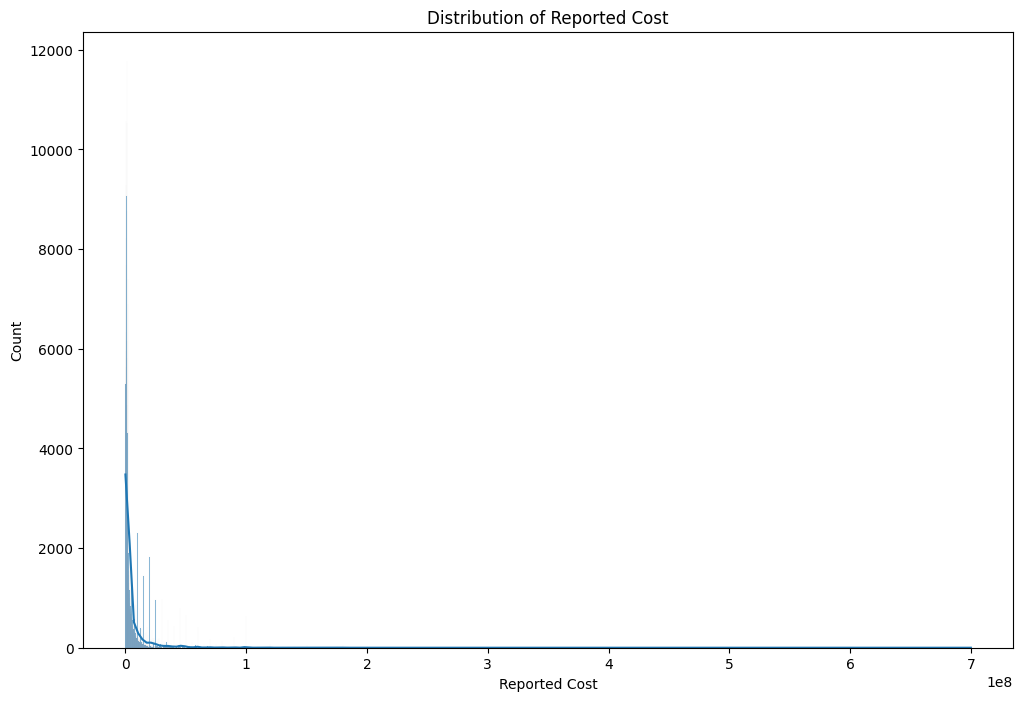

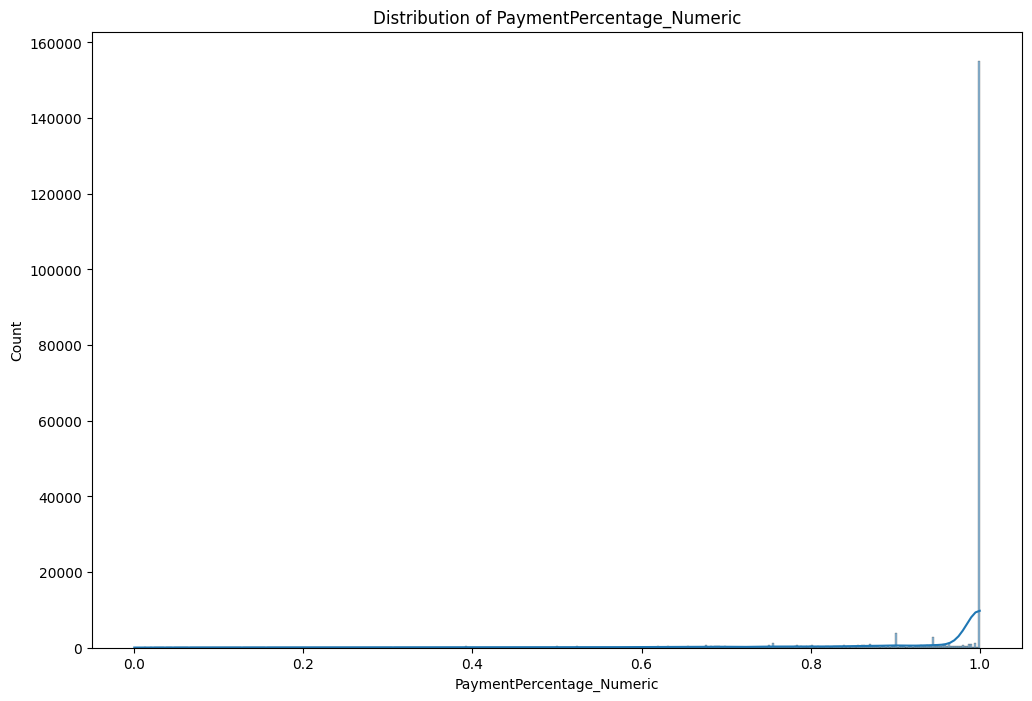

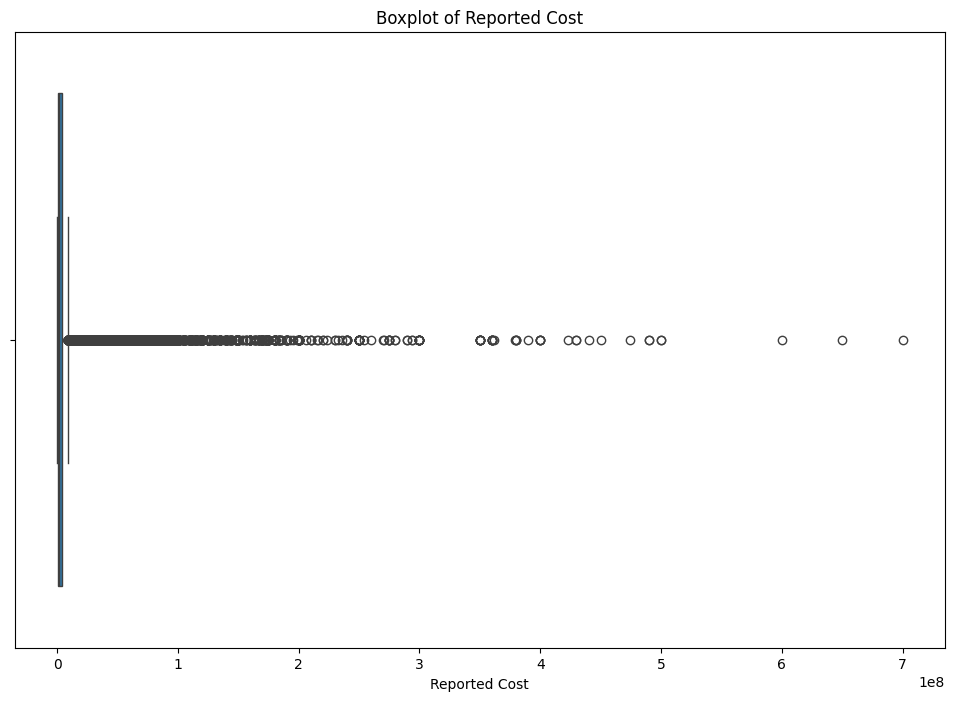

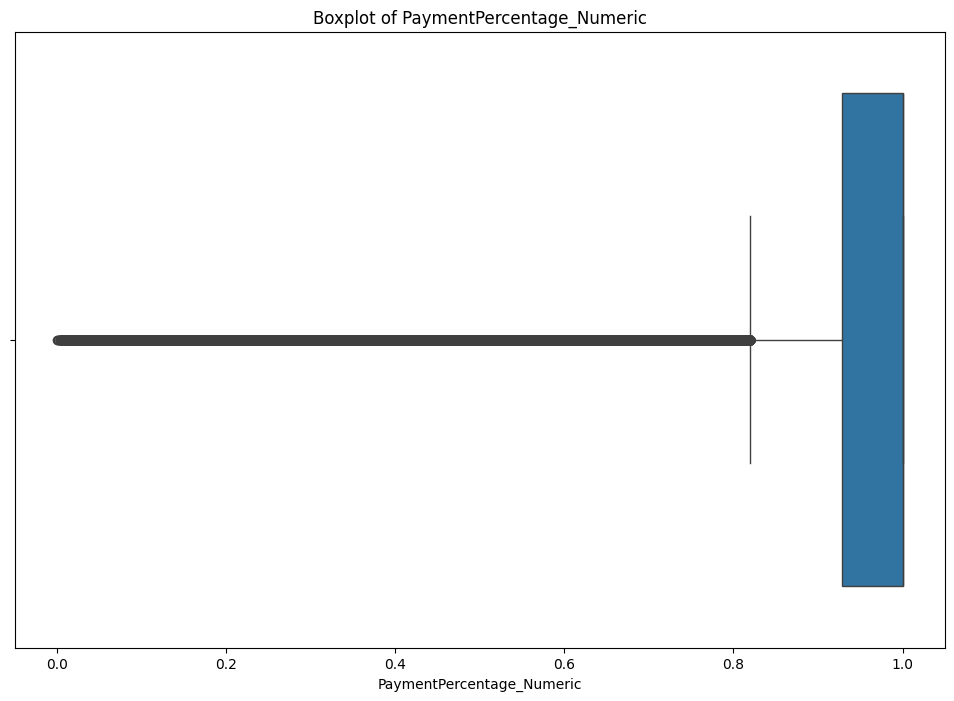

In [ ]:
# Numerical columns' list
numerical_cols = ['Reported Cost', 'PaymentPercentage_Numeric']

# Histogram
for col in numerical_cols:
    plt.figure(figsize=(12, 8))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

# BoxPlot
for col in numerical_cols:
    plt.figure(figsize=(12, 8))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

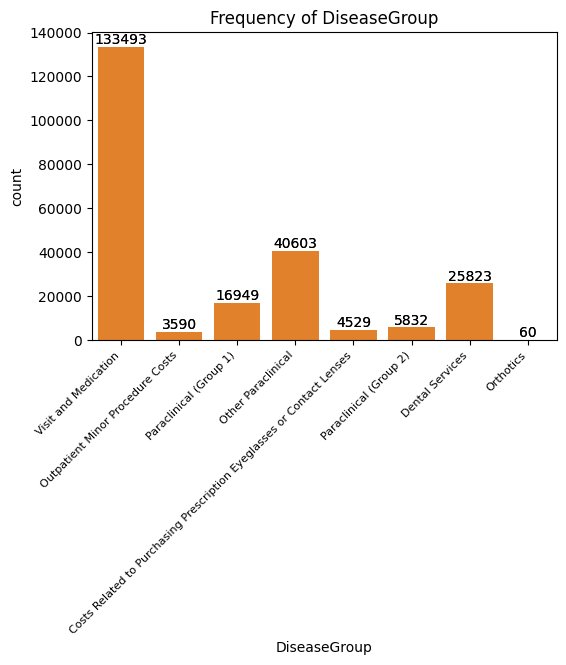

In [ ]:
plt.figure(figsize=(6, 4))
ax = sns.countplot(x='DiseaseGroup', data=df)
sns.countplot(x='DiseaseGroup', data=df)

# برای اینکه روی هر میله تعداد هر دسته را بنویسد
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom')
plt.xticks(fontsize=8, rotation=45, ha='right')
plt.title('Frequency of DiseaseGroup')
plt.show()

### Data Correlation

In [ ]:
# Select only numeric columns for correlation calculation
numerical_df = df.select_dtypes(include=np.number)

# Calculate the correlation matrix
correlation_matrix = numerical_df.corr(method='pearson')

# نمایش ماتریس همبستگی
print("ماتریس همبستگی پیرسون:")
print(correlation_matrix)

ماتریس همبستگی پیرسون:
                                Row  BirthYear  Relation  PersonnelCode  \
Row                        1.000000  -0.009890  0.020277       0.032318   
BirthYear                 -0.009890   1.000000 -0.214419       0.006726   
Relation                   0.020277  -0.214419  1.000000      -0.010852   
PersonnelCode              0.032318   0.006726 -0.010852       1.000000   
PlanName                   0.121569  -0.050732  0.007094       0.017672   
Reported Cost              0.102535  -0.061329 -0.032192       0.031344   
Paid Cost                  0.116858  -0.066768 -0.023332       0.017913   
PaymentPercentage_Numeric  0.128441  -0.020858  0.029831      -0.012228   

                           PlanName  Reported Cost  Paid Cost  \
Row                        0.121569       0.102535   0.116858   
BirthYear                 -0.050732      -0.061329  -0.066768   
Relation                   0.007094      -0.032192  -0.023332   
PersonnelCode              0.017672      

## **Preprocessing**

### Noisy data and outlier Handling

In [ ]:
def find_outliers(df, column, factor=3):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - factor * IQR
    upper_bound = Q3 + factor * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

outliers_reported = find_outliers(df, 'Reported Cost', factor=1.5)
outliers_reported2 = find_outliers(df, 'Paid Cost', factor=1.5)

print(f"Outliers in Reported Cost (factor=1.5): {len(outliers_reported)} values")
print(f"Outliers in Reported Cost (factor=1.5): {len(outliers_reported2)} values")

Outliers in Reported Cost (factor=1.5): 32907 values
Outliers in Reported Cost (factor=1.5): 31664 values


**Detecting outliers based on "DiseaseGroup"**

In [ ]:
grouped = df.groupby('DiseaseGroup')
length = 0

for name, group in grouped:
    outliers = find_outliers(group, 'Reported Cost', factor=1.5)
    length += len(outliers)
    print(f"Group: {name}, Outliers in Reported Cost: {len(outliers)}", '\n')

print(f"Total Outliers in Reported Cost: {length} values")

Group: Costs Related to Purchasing Prescription Eyeglasses or Contact Lenses, Outliers in Reported Cost: 28 

Group: Dental Services, Outliers in Reported Cost: 2213 

Group: Orthotics, Outliers in Reported Cost: 4 

Group: Other Paraclinical, Outliers in Reported Cost: 3483 

Group: Outpatient Minor Procedure Costs, Outliers in Reported Cost: 359 

Group: Paraclinical (Group 1), Outliers in Reported Cost: 1555 

Group: Paraclinical (Group 2), Outliers in Reported Cost: 337 

Group: Visit and Medication, Outliers in Reported Cost: 10637 

Total Outliers in Reported Cost: 18616 values


In [ ]:
grouped = df.groupby('DiseaseGroup')
length = 0

for name, group in grouped:
    outliers = find_outliers(group, 'Paid Cost', factor=1.5)
    length += len(outliers)
    print(f"Group: {name}, Outliers in Paid Cost: {len(outliers)}", '\n')

print(f"Total Outliers in Paid Cost: {length} values")

Group: Costs Related to Purchasing Prescription Eyeglasses or Contact Lenses, Outliers in Paid Cost: 0 

Group: Dental Services, Outliers in Paid Cost: 2172 

Group: Orthotics, Outliers in Paid Cost: 5 

Group: Other Paraclinical, Outliers in Paid Cost: 3500 

Group: Outpatient Minor Procedure Costs, Outliers in Paid Cost: 290 

Group: Paraclinical (Group 1), Outliers in Paid Cost: 1496 

Group: Paraclinical (Group 2), Outliers in Paid Cost: 353 

Group: Visit and Medication, Outliers in Paid Cost: 10551 

Total Outliers in Paid Cost: 18367 values




---

قبل لگاریتم گرفتن چولگی دو ستون «هزینه پرداخت شده» و «اعلام شده» را می‌سنجیم


---



In [ ]:
from scipy.stats import skew

print("Skewness of Reported Cost:", skew(df['Reported Cost'].dropna()))
print("Skewness of Paid Cost:", skew(df['Paid Cost'].dropna()))

Skewness of Reported Cost: 9.252534864766439
Skewness of Paid Cost: 9.169874225203078


In [ ]:
df['Log_Reported'] = np.log1p(df['Reported Cost'])
df['Log_Paid'] = np.log1p(df['Paid Cost'])

outliers_log_reported = find_outliers(df, 'Log_Reported', factor=1.5)
outliers_log_paid = find_outliers(df, 'Log_Paid', factor=1.5)

print(f"Outliers in Log Reported Cost: {len(outliers_log_reported)} values")
print(f"Outliers in Log Paid Cost: {len(outliers_log_paid)} values")

Outliers in Log Reported Cost: 7834 values
Outliers in Log Paid Cost: 6169 values


In [ ]:
grouped = df.groupby('DiseaseGroup')
length = 0

for name, group in grouped:
    outliers = find_outliers(group, 'Log_Reported', factor=1.5)
    length += len(outliers)
    print(f"Group: {name}, Outliers in Log_Reported: {len(outliers)}", '\n')

print(f"Total Outliers in Log_Reported: {length} values")

Group: Costs Related to Purchasing Prescription Eyeglasses or Contact Lenses, Outliers in Log_Reported: 48 

Group: Dental Services, Outliers in Log_Reported: 749 

Group: Orthotics, Outliers in Log_Reported: 1 

Group: Other Paraclinical, Outliers in Log_Reported: 209 

Group: Outpatient Minor Procedure Costs, Outliers in Log_Reported: 34 

Group: Paraclinical (Group 1), Outliers in Log_Reported: 550 

Group: Paraclinical (Group 2), Outliers in Log_Reported: 69 

Group: Visit and Medication, Outliers in Log_Reported: 8661 

Total Outliers in Log_Reported: 10321 values


In [ ]:
grouped = df.groupby('DiseaseGroup')
length = 0

for name, group in grouped:
    outliers = find_outliers(group, 'Log_Paid', factor=1.5)
    length += len(outliers)
    print(f"Group: {name}, Outliers in Log_Paid: {len(outliers)}", '\n')

print(f"Total Outliers in Log_Paid: {length} values")

Group: Costs Related to Purchasing Prescription Eyeglasses or Contact Lenses, Outliers in Log_Paid: 17 

Group: Dental Services, Outliers in Log_Paid: 1248 

Group: Orthotics, Outliers in Log_Paid: 1 

Group: Other Paraclinical, Outliers in Log_Paid: 29 

Group: Outpatient Minor Procedure Costs, Outliers in Log_Paid: 27 

Group: Paraclinical (Group 1), Outliers in Log_Paid: 478 

Group: Paraclinical (Group 2), Outliers in Log_Paid: 68 

Group: Visit and Medication, Outliers in Log_Paid: 10647 

Total Outliers in Log_Paid: 12515 values


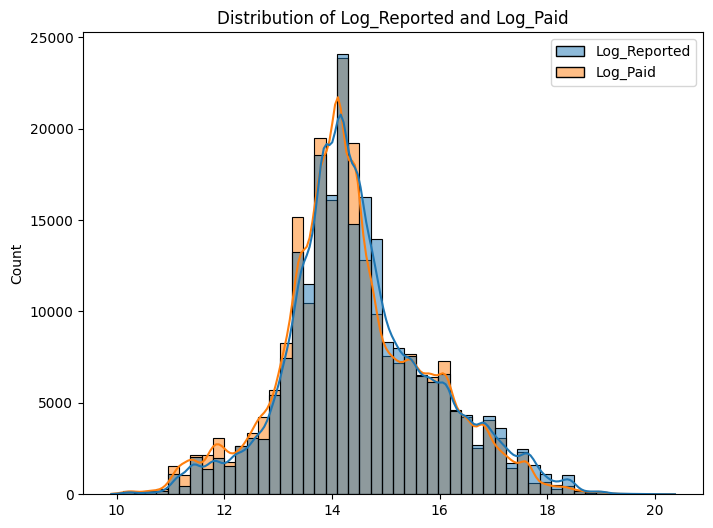

In [ ]:
plt.figure(figsize=(8, 6))
# Selecting both columns using a list
sns.histplot(df[['Log_Reported', 'Log_Paid']], kde=True, bins=50)
plt.title(f'Distribution of Log_Reported and Log_Paid')
plt.show()

In [ ]:
from scipy.stats import skew

print("Skewness of Log Reported Cost:", skew(df['Log_Reported'].dropna()))
print("Skewness of Log Paid Cost:", skew(df['Log_Paid'].dropna()))

Skewness of Log Reported Cost: 0.3871789177755978
Skewness of Log Paid Cost: 0.25109896695174294




---


* چون بعد از اینکه از ستون "هزینه اعلام شده" و "پرداخت شده" لگاریتم گرفتیم، داده‌ها تقریبا نرمال شدند (چولگی 0.39 و 0.25 تقریبا نرمال محسوب میشود) برای همین بهتر است از روش زد-اسکور برای محاسبه‌ی پرت‌هایشان استفاده کرد


---



In [ ]:
from scipy.stats import zscore

df['Z_Log_Reported'] = zscore(df['Log_Reported'].dropna())

outliers_z = df[abs(df['Z_Log_Reported']) > 3]
print(f"Outliers in Log_Reported with Z-Score: {len(outliers_z)} values")

outliers_grouped_z = []
for name, group in df.groupby('DiseaseGroup'):
    group['Z_Log_Reported'] = zscore(group['Log_Reported'].dropna())
    group_outliers = group[abs(group['Z_Log_Reported']) > 3]
    outliers_grouped_z.extend(group_outliers.index)
outliers_grouped_z = df.loc[outliers_grouped_z]
print(f"Outliers in Log_Reported with Z-Score (grouped): {len(outliers_grouped_z)} values")

Outliers in Log_Reported with Z-Score: 607 values
Outliers in Log_Reported with Z-Score (grouped): 2081 values


In [ ]:
from scipy.stats import zscore

df['Z_log_Paid'] = zscore(df['Log_Paid'].dropna())

outliers_z = df[abs(df['Z_log_Paid']) > 3]
print(f"Outliers in Log_Paid with Z-Score: {len(outliers_z)} values")

outliers_grouped_z = []
for name, group in df.groupby('DiseaseGroup'):
    group['Z_log_Paid'] = zscore(group['Log_Paid'].dropna())
    group_outliers = group[abs(group['Z_log_Paid']) > 3]
    outliers_grouped_z.extend(group_outliers.index)
outliers_grouped_z = df.loc[outliers_grouped_z]
print(f"Outliers in Log_Paid with Z-Score (grouped): {len(outliers_grouped_z)} values")

Outliers in Log_Paid with Z-Score: 736 values
Outliers in Log_Paid with Z-Score (grouped): 1601 values




---


* حذف پرت‌های ستون "اعلام شده" بعد از شناسایی آنها. همه‌ی پرتها بر اساس گروه‌بندی حذف شدند (2081 داده)


---



In [ ]:
outliers_grouped_z = []
for name, group in df.groupby('DiseaseGroup'):
    group['Z_Log_Reported'] = zscore(group['Log_Reported'].dropna())
    group_outliers = group[abs(group['Z_Log_Reported']) > 3]
    outliers_grouped_z.extend(group_outliers.index)

df_clean = df[~df.index.isin(outliers_grouped_z)]

In [ ]:
outliers_grouped_z = []
for name, group in df.groupby('DiseaseGroup'):
    group['Z_log_Paid'] = zscore(group['Log_Paid'].dropna())
    group_outliers = group[abs(group['Z_log_Paid']) > 3]
    outliers_grouped_z.extend(group_outliers.index)

df_clean = df_clean[~df_clean.index.isin(outliers_grouped_z)]



---


**حذف ستونهای غیرمفید. غیر مفید بودن این ستونها به این علت است که هزینه پرداخت شده و اعلام شده و حتی لگاریتمی‌شان با «زد اسکور» جایگزین شده و ستون درصد پرداخت هم از رابطه بین هزینه پرداخت شده و اعلام شده به دست می‌آید و نیازی به نگه داشتن آن نیست**


---



In [ ]:
columns_to_drop = ['Reported Cost', 'Paid Cost', 'Log_Reported', 'Log_Paid', 'PaymentPercentage_Numeric']

df_clean = df_clean.drop(columns=columns_to_drop)

### Missing Data Handling

In [ ]:
df_clean.head()

,Row,Year,RemittanceDate,BirthYear,Relation,PersonnelCode,Company,PlanName,DiseaseDate,ClaimDate,DiseaseGroup,DiseaseType,DocumentDeliveryType,Z_Log_Reported,Z_log_Paid
1,2,1401-1402,1401-09-10,1363,1,461415,شرکتی,4,1401-09-05,1401-09-06,Visit and Medication,هزینه ویزیت,از بیمه شده,-0.593003,-0.574871
2,3,1401-1402,1401-09-13,1340,4,461421,شرکتی,4,1401-09-03,1401-09-11,Outpatient Minor Procedure Costs,سایر اعمال مجاز سرپایی,از بیمه گذار,0.913197,1.009102
3,4,1401-1402,1401-09-13,1340,4,461421,شرکتی,4,1401-09-03,1401-09-11,Paraclinical (Group 1),انواع آندوسکوپی و کولونوسکوپی,از بیمه گذار,1.598488,1.449619
4,5,1401-1402,1401-09-13,1340,4,461421,شرکتی,4,1401-09-03,1401-09-11,Visit and Medication,هزینه ویزیت,از بیمه گذار,-1.359214,-1.263897
5,6,1401-1402,1401-09-13,1340,4,461421,شرکتی,4,1401-09-03,1401-09-11,Other Paraclinical,تزریقات,از بیمه گذار,-1.239765,-1.144416


In [ ]:
# محاسبه تعداد گمشده‌ها

df_clean.isnull().sum()

,0
Row,0
Year,0
RemittanceDate,0
BirthYear,0
Relation,0
PersonnelCode,25017
Company,0
PlanName,0
DiseaseDate,0
ClaimDate,10990




---


* باید ببینیم در ستون «کد پرسنلی» چند داده‌ی یونیک وجود دارد. یعنی این دیتاست مربوط به چند نفر است


---



In [ ]:
df_clean['PersonnelCode'].unique().size

np.int64(3344)



---


* اینهمه داده مربوط به درخواستهای تنها 3345 نفر است (البته بدون در نظر گرفتن گمشده‌ها). به نظر میرسد حذف کردن کل ستون «کد پرسنلی» آسیبی به مدلسازی نزند ولی بهتر است قبل از حذف آن بررسی کنیم ببینیم آیا همبستگی خاصی بین این ستون و ستون «هزینه پرداخت شده» وجود دارد یا نه. مثلا اینکه آیا با زیاد بودن درخواست امکان دارد هزینه پرداخت شده برای اشخاص کمتر شود؟
---



In [ ]:
# 1. شمارش تعداد درخواست‌ها برای هر کد پرسنلی
request_counts = df_clean.groupby('PersonnelCode').size().reset_index(name='RequestCount')

# 2. محاسبه میانگین هزینه پرداخت شده برای هر کد پرسنلی
mean_payment = df_clean.groupby('PersonnelCode')['Z_log_Paid'].mean().reset_index(name='Z_log_Paid')

# 3. ادغام دو دیتافریم
personnel_data = pd.merge(request_counts, mean_payment, on='PersonnelCode')

# 4. محاسبه ضریب همبستگی پیرسون
correlation = personnel_data[['RequestCount', 'Z_log_Paid']].corr(method='pearson')
print("ضریب همبستگی پیرسون:")
print(correlation)

ضریب همبستگی پیرسون:
              RequestCount  Z_log_Paid
RequestCount      1.000000   -0.253322
Z_log_Paid       -0.253322    1.000000




---

همانگونه که معلوم است همبستگی منفی ضعیفی بین «کد پرسنلی» و «هزینه پرداخت شده» وجود دارد پس ستون «کدپرسنلی» را حذف نمیکنیم و موارد گمدشه‌اش را پر میکنیم

---





---

*  به داده‌های گمشده ستون «تاریخ اعلام خسارت» دست نمیزنم زیرا طبق تستی که کردم در دقت مدل تاثیری ندارد. در مرحله بعد میرویم سراغ اینکود کردن

---



In [ ]:
# 1. شمارش تعداد درخواست‌ها برای هر کد پرسنلی
request_counts = df_clean.groupby('ClaimDate').size().reset_index(name='RequestCount')

# 2. محاسبه میانگین هزینه پرداخت شده برای هر کد پرسنلی
mean_payment = df_clean.groupby('ClaimDate')['Z_log_Paid'].mean().reset_index(name='Z_log_Paid')

# 3. ادغام دو دیتافریم
personnel_data = pd.merge(request_counts, mean_payment, on='ClaimDate')

# 4. محاسبه ضریب همبستگی پیرسون
correlation = personnel_data[['RequestCount', 'Z_log_Paid']].corr(method='pearson')
print("ضریب همبستگی پیرسون:")
print(correlation)

ضریب همبستگی پیرسون:
              RequestCount  Z_log_Paid
RequestCount      1.000000   -0.280445
Z_log_Paid       -0.280445    1.000000


### Encoding and Standardization



---


* چهار ستون غیرعددی داریم که باید عددی شود. «گروه بیماری»، «نوع تحویل مدارک»، «نوع بیماری» و «شرکت».
واضح است که بین گروه‌های بیماری ترتیب خاصی نیست و باید «وان هات اینکودینگ» بشود ولی در مورد ستون «شرکت» و «نوع تحویل مدرک» نمیدانیم ترتیبی هست یا نه. اول تست میکنیم ببینیم چنین ترتیبی وجود دارد یا نه (مثلا هزینه پرداخت شده برای پیمانکار یا ماهان یا دیگر موارد تفاوتی دارد؟) اگر ترتیب داشت که اینکود معمولی میکنیم وگرنه آن را هم وان هات اینکودینگ میکنیم
البته در صورت وجود ترتیب باز «وان هات اینکودینگ» محافظه‌کارانه‌تر است

---



In [ ]:
df_clean['Company'].unique()

array(['شرکتی', 'پیمانکار خدمات', 'پیکر', 'پیمانکار تعمیرات', 'ماهان',
       'پیمانکار نقلیه', 'پیمانکار خدماتی'], dtype=object)

In [ ]:
# 1. محاسبه میانگین هزینه پرداخت شده برای هر شرکت
company_means = df_clean.groupby('Company')['Z_log_Paid'].mean().sort_values()
print("میانگین درصد پرداخت به ترتیب:")
print(company_means)

میانگین درصد پرداخت به ترتیب:
Company
پیکر               -0.263107
پیمانکار خدمات     -0.235011
ماهان              -0.091583
پیمانکار تعمیرات   -0.042641
پیمانکار نقلیه     -0.025193
شرکتی               0.089817
پیمانکار خدماتی     0.118568
Name: Z_log_Paid, dtype: float64


In [ ]:
df_clean['DocumentDeliveryType'].unique()

array(['از بیمه شده', 'از بیمه گذار',
       'از مرکز درمانی معرفی شده با معرفینامه یا دفترچه'], dtype=object)

In [ ]:
# 1. محاسبه میانگین هزینه پرداخت شده برای هر نوع تحویل
company_means = df_clean.groupby('DocumentDeliveryType')['Z_log_Paid'].mean().sort_values()
print("میانگین درصد پرداخت به ترتیب:")
print(company_means)

میانگین درصد پرداخت به ترتیب:
DocumentDeliveryType
از بیمه گذار                                      -0.067092
از بیمه شده                                        0.226653
از مرکز درمانی معرفی شده با معرفینامه یا دفترچه    0.380061
Name: Z_log_Paid, dtype: float64




---


میانگین هزینه پرداخت به ازای هر شرکت و هر نوع تحویل مدرک نشانگر تفاوت  بین آنها است ولی برای دقت یک بار هم تست آنوا (تحلیل واریانس) میگیریم


---



In [ ]:
from scipy.stats import f_oneway

# جدا کردن داده‌های درصد پرداخت برای هر شرکت
companies = df_clean['Company'].unique()
payment_groups = [df_clean[df_clean['Company'] == company]['Z_log_Paid'] for company in companies]

# اجرای تست ANOVA
statistic, p_value = f_oneway(*payment_groups)
print(f"آماره ANOVA: {statistic}")
print(f"p-value: {p_value}")

# تصمیم‌گیری
if p_value < 0.05:
    print("تفاوت بین میانگین‌ها معنی‌دار است و فرضیه صفر رد می‌شود")
else:
    print("تفاوت بین میانگین‌ها معنی‌دار نیست")

آماره ANOVA: 536.5856072952927
p-value: 0.0
تفاوت بین میانگین‌ها معنی‌دار است و فرضیه صفر رد می‌شود


In [ ]:
from scipy.stats import f_oneway

# جدا کردن داده‌های درصد پرداخت برای هر شرکت
companies = df_clean['DocumentDeliveryType'].unique()
payment_groups = [df_clean[df_clean['DocumentDeliveryType'] == company]['Z_log_Paid'] for company in companies]

# اجرای تست ANOVA
statistic, p_value = f_oneway(*payment_groups)
print(f"آماره ANOVA: {statistic}")
print(f"p-value: {p_value}")

# تصمیم‌گیری
if p_value < 0.05:
    print("تفاوت بین میانگین‌ها معنی‌دار است و فرضیه صفر رد می‌شود")
else:
    print("تفاوت بین میانگین‌ها معنی‌دار نیست")

آماره ANOVA: 3545.583997462255
p-value: 0.0
تفاوت بین میانگین‌ها معنی‌دار است و فرضیه صفر رد می‌شود




---


*   تست آنوا نشانگر این است که تفاوت بین داده‌ها معنی دار است. با اینکه این تفاوت بین درصد پرداخت برای هر شرکت، کوچک است ولی با توجه به زیادی تعداد داده‌ها و واریانس آنها این تفاوت معنی دار بوده و ترتیب بینشان وجود دارد
البته این وصف باز میتوان این ستون را وان هات اینکودینگ کرد ولی فعلا اینکودینگ معمولی را تست میگیریم تا ببینیم کدام یک در دقت مدل تاثیر بهتری دارد

---






In [ ]:
# تعریف ترتیب بر اساس میانگین‌ها
company_order = {
    'پیمانکار خدمات': 0,
    'پیکر': 1,
    'پیمانکار نقلیه': 2,
    'پیمانکار تعمیرات': 3,
    'ماهان': 4,
    'شرکتی': 5,
    'پیمانکار خدماتی': 6
}
df_clean['Company_Ordinal'] = df_clean['Company'].map(company_order)

# بررسی
print(df_clean['Company_Ordinal'].value_counts())

Company_Ordinal
5    91159
6    35632
2    30177
3    29253
0    24796
4    13680
1     3569
Name: count, dtype: int64




---


بعد از ترین کردن و تست مدل متوجه شدم «وان هات اینکودینگ» تاثیر بهتری دارد

---



In [ ]:
df_clean = pd.get_dummies(df_clean, columns=['Company'], prefix='Company')

In [ ]:
df_clean = pd.get_dummies(df_clean, columns=['DocumentDeliveryType'], prefix='DocumentDeliveryType')

In [ ]:
# انکودینگ گروه بیماری
df_clean = pd.get_dummies(df_clean, columns=['DiseaseGroup'], prefix='DiseaseGroup')



---


یک تست دیگر برای اطمینان از اینکه آیا تفاوت خاصی بین «نسبت»‌ها وجود دارد یا نه

---



In [ ]:
relation_means = df.groupby('Relation')['Z_log_Paid'].mean().sort_values()
print("میانگین هزینه پرداخت برای هر نسبت:")
print(relation_means)

میانگین هزینه پرداخت برای هر نسبت:
Relation
2   -0.204527
3   -0.160040
4    0.025847
1    0.044197
5    0.066061
0    0.104839
Name: Z_log_Paid, dtype: float64


**یکبار هم تست آنوا میگیریم**

In [ ]:
from scipy.stats import f_oneway

# جدا کردن داده‌های درصد پرداخت برای هر شرکت
companies = df_clean['Relation'].unique()
payment_groups = [df_clean[df_clean['Relation'] == company]['Z_log_Paid'] for company in companies]

# اجرای تست ANOVA
statistic, p_value = f_oneway(*payment_groups)
print(f"آماره ANOVA: {statistic}")
print(f"p-value: {p_value}")

# تصمیم‌گیری
if p_value < 0.05:
    print("تفاوت بین میانگین‌ها معنی‌دار است و فرضیه صفر رد می‌شود")
else:
    print("تفاوت بین میانگین‌ها معنی‌دار نیست")

آماره ANOVA: 577.6659599849282
p-value: 0.0
تفاوت بین میانگین‌ها معنی‌دار است و فرضیه صفر رد می‌شود




---
چون «پی‌ولیو» نزدیک به صفره پس حذف نمیکنم چون تفاوت معنی دار است. اینکود میکنم

---




In [ ]:
df_clean = pd.get_dummies(df_clean, columns=['Relation'], prefix='Relation')

تبدیل «سال تولد» به سن و سپس استانداردسازی

In [ ]:
from sklearn.preprocessing import StandardScaler

# تبدیل به سن (فرض می‌کنیم سال فعلی 1404)
df_clean['Age'] = 1404 - df_clean['BirthYear']

# استانداردسازی
scaler = StandardScaler()
df_clean['Age_Standardized'] = scaler.fit_transform(df_clean[['Age']])

# بررسی
print(df_clean['Age_Standardized'].describe())

count    2.282660e+05
mean    -1.095700e-17
std      1.000002e+00
min     -1.887079e+00
25%     -5.538605e-01
50%      8.608444e-02
75%      4.593857e-01
max      3.872425e+00
Name: Age_Standardized, dtype: float64


ستون «طرح» را استاندارد میکنیم

In [ ]:
scaler = StandardScaler()
df_clean['PlanName_Standardized'] = scaler.fit_transform(df_clean[['PlanName']])

print(df_clean['PlanName_Standardized'].describe())

count    2.282660e+05
mean    -2.490227e-16
std      1.000002e+00
min     -3.577408e+00
25%     -7.281982e-01
50%      6.964066e-01
75%      6.964066e-01
max      6.964066e-01
Name: PlanName_Standardized, dtype: float64




---

چون تعداد داده‌های ستون «نوع بیماری» زیاد است به جای «وان هات اینکودینگ» از «تارگت اینکودینگ» استفاده میکنیم

---



In [ ]:
# Target Encoding برای DiseaseType
mean_encoding = df_clean.groupby('DiseaseType')['Z_log_Paid'].mean()
df_clean['DiseaseType_Encoded'] = df_clean['DiseaseType'].map(mean_encoding)

# بررسی
print(df_clean['DiseaseType_Encoded'].head())

1   -0.422600
2    0.341211
3    1.370494
4   -0.422600
5   -1.327007
Name: DiseaseType_Encoded, dtype: float64


In [ ]:
df_clean.to_csv('df_clean.csv', index=False)

In [ ]:
pd.set_option('display.max_columns', None)
df_clean

,Row,Year,RemittanceDate,BirthYear,PersonnelCode,PlanName,DiseaseDate,ClaimDate,DiseaseType,Z_Log_Reported,Z_log_Paid,Company_Ordinal,Company_شرکتی,Company_ماهان,Company_پیمانکار تعمیرات,Company_پیمانکار خدمات,Company_پیمانکار خدماتی,Company_پیمانکار نقلیه,Company_پیکر,DocumentDeliveryType_از بیمه شده,DocumentDeliveryType_از بیمه گذار,DocumentDeliveryType_از مرکز درمانی معرفی شده با معرفینامه یا دفترچه,DiseaseGroup_Costs Related to Purchasing Prescription Eyeglasses or Contact Lenses,DiseaseGroup_Dental Services,DiseaseGroup_Orthotics,DiseaseGroup_Other Paraclinical,DiseaseGroup_Outpatient Minor Procedure Costs,DiseaseGroup_Paraclinical (Group 1),DiseaseGroup_Paraclinical (Group 2),DiseaseGroup_Visit and Medication,Relation_0,Relation_1,Relation_2,Relation_3,Relation_4,Relation_5,Age,Age_Standardized,PlanName_Standardized,DiseaseType_Encoded
1,2,1401-1402,1401-09-10,1363,461415,4,1401-09-05,1401-09-06,هزینه ویزیت,-0.593003,-0.574871,5,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,41,0.246071,0.696407,-0.422600
2,3,1401-1402,1401-09-13,1340,461421,4,1401-09-03,1401-09-11,سایر اعمال مجاز سرپایی,0.913197,1.009102,5,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,64,1.472632,0.696407,0.341211
3,4,1401-1402,1401-09-13,1340,461421,4,1401-09-03,1401-09-11,انواع آندوسکوپی و کولونوسکوپی,1.598488,1.449619,5,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,64,1.472632,0.696407,1.370494
4,5,1401-1402,1401-09-13,1340,461421,4,1401-09-03,1401-09-11,هزینه ویزیت,-1.359214,-1.263897,5,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,64,1.472632,0.696407,-0.422600
5,6,1401-1402,1401-09-13,1340,461421,4,1401-09-03,1401-09-11,تزریقات,-1.239765,-1.144416,5,True,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,64,1.472632,0.696407,-1.327007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230874,230981,1402-1403,1403-08-07,1356,360059,4,1403-07-21,1403-08-06,بیوفیدبک,1.011245,1.107176,6,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,48,0.619372,0.696407,1.096100
230875,230982,1402-1403,1403-08-07,1356,360059,4,1403-07-17,1403-08-06,بیوفیدبک,1.011245,1.107176,6,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,48,0.619372,0.696407,1.096100
230876,230983,1402-1403,1403-08-24,1389,360043,4,1403-06-07,1403-08-20,بیوفیدبک,2.249529,2.345780,6,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,15,-1.140477,0.696407,1.096100
230877,230984,1402-1403,1403-08-30,1360,360413,4,1403-06-07,1403-08-27,درمان رادیوایزوتوپ,1.882807,1.978963,6,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False,False,False,44,0.406057,0.696407,1.963602
